*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#16.-Structured-Probabilistic-Models-for-Deep-Learning" data-toc-modified-id="16.-Structured-Probabilistic-Models-for-Deep-Learning-1">16. Structured Probabilistic Models for Deep Learning</a></span><ul class="toc-item"><li><span><a href="#16.1-The-Challenge-of-Unstructured-Modeling" data-toc-modified-id="16.1-The-Challenge-of-Unstructured-Modeling-1.1">16.1 The Challenge of Unstructured Modeling</a></span></li><li><span><a href="#16.2-Using-Graphs-to-Describe-Model-Structure" data-toc-modified-id="16.2-Using-Graphs-to-Describe-Model-Structure-1.2">16.2 Using Graphs to Describe Model Structure</a></span><ul class="toc-item"><li><span><a href="#Directed-Models" data-toc-modified-id="Directed-Models-1.2.1">Directed Models</a></span></li></ul></li></ul></li></ul></div>

## 16. Structured Probabilistic Models for Deep Learning

Syväoppivien menetelmien kehittämisessä hyödynnetään monia kurinalaisia mallintamistapoja, joista eräs on rakenteellisten todennäköisyysmallien (*structuder probabilistic models*) idea. Se on monien viimeaikaisten syviin menetelmiin kohdistuvien pääkomponenttina. Siksi tässä kappaleessa keskitytään pelkästään niihin.

Rakenteelliset todennäköisyysmallit ovat graafimaisia malleja, joissa mallin tuottama jakauma voidaan hajottaa osiinsa ja osien välisiä vuorovaikutussuhteita on mahdollista myös tarkastella. Kootusti näitä malleja kutsutaan graafisiksi (*graphical*) ja niihin keskittyvä tutkimusyhteisö onkin tuottanut kirjavan kattauksen malleja ja algoritmeja. Syväoppivien menetelmien kanssa graafisten mallien käyttö eroaa muista käyttökohteista.

### 16.1 The Challenge of Unstructured Modeling

Syväoppivien menetelmien koulutuksen tavoitteena on korkeadimensioisen ja rikasrakenteisen datan ymmärtäminen. Perinteisessä luokittelussa menetetään paljon informaatiota, kun vaikkapa rikasrakenteisista kuvista tuotetaan vain yksi luokka. Samoin tunnistetun luokan ohella kuvan muu sisältö jää huomiotta. Todennäköisyysmalleilla kyetään saavuttamaan rikkaampia tuloksia, joskin kompleksimman koulutuksen kustannuksella.

Rikkaampia tuloksia tuottavia koneoppimistehtäviä ovat ainakin:

 - **Jakauman ennustaminen** (*density estimation*): Tehtävän tavoitteena on tuottaa täydellinen datantuottojakauma $p(x)$.
 - **Kohinan poisto** (*denoising*): Korruptoituneista syötteistä $\tilde{x}$ pyritään löytämään alkuperäinen datantuottojakauma. Tätä voi olla mm. vanhojen valokuvien restaurointi.
 - **Puuttuvien arvojen paikkaus** (*missing value imputation*): Näytedatojen $x$ perusteella pyritään muodostamaan koko näyteavaruuden kattava jakauma, mikä on mahdollista vain koko datantuottoprosessin opettelulla.
 - **Näytteistys** (*sampling*): Mallilla tuotetaan datantuottoprosessin mukaisia uusia näytteitä.
 
Esimerkiksi näytteistyksen kohdalla kyse etenkin generatiivisista malleista, joilla pyritään tuottamaan koulutuksen näytekuvia vastaavia kuvia.

Kuvat ovatkin hyvä esimerkki rikkaista jakaumista. Yhdessä $32 \times 32$ värivalokuvassa on yhteensä $32 \times 32 \times 3 = 3072$ mahdollista muuttujaa eli pikseliä. Mikäli jokainen pikseli voisi saada vain joko-tai-arvon, olisi mahdollisia arvoja 2^3072, mikä on mahdoton mallinnettava luku. Perinteinen lähestymistapa, jossa jokaiselle muuttujalle ja sen arvolle lasketaan myös oma todennäköisyytensä, on näin suurissa muuttujamärrissä muistin kannalta mahdoton toteuttaa. Muita rajoittavia tekijöitä on koulutusdatan vähyys ja siitä seuraava tilastollisen merkitsevyyden heikkous sekä laskennan kustannukset.

Todellisuudessa mallinnettavan ongelman muuttujat ovat usein toisistaan riippuvaisia vain välillisesti. Vain osa muuttujien välisistä suhteista on välittömiä ja täten merkittäviä mallinnuksen kannalta. Kun mallinnuksella pyritään tavoittamaan vain nämä välittömät yhteydet, pienenee mallin opittavien parametrien määrä huomattavasti ja mallinnuksesta tulee mielekästä. Todennäköisyysmalleilla pyritään tähän.

### 16.2 Using Graphs to Describe Model Structure

Kuten sanottua, todennäköisyysmallit hyödyntävät graafeja eli solmuja ja kaaria mallinnettavan kohteen muuttujien välittömien suhteiden mallintamisessa. Graafeilla voidaan todennäköisyyksiä mallintaa useammilla tavoilla.

#### Directed Models

Ensimmäinen näistä tavoista on suunnattujen graafimallien (*directed graphical models*) käyttö, jotka tunnetaan myös uskomusverkko (*belief network*) tai Bayesilainen verkko (*Bayesian network*). Nimensä mukaisesti mallien kaaret ovat suunnattuja, jolloin ne muodostavat vaikutussuhteita muuttujien todennäköisyysjakaumien välille. Kaarien lähtömuuttujien arvot vaikuttavat kohdemuuttujien todennäköisyysjakaumaan.

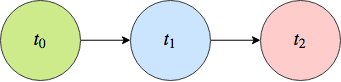

Yllä olevassa graafissa **välittömät** suunnatut riippuvuudet ovat $(t_0,t_1)$ ja $(t_1,t_2)$. Vaikka $t_2$ riippuukin välillisesti muuttujasta $t_0$, vain välittömät riippuvuudet mallinetaan. Näiden muuttujien todennäköisyys voidaan ilmaista kaavalla 

$$p(t_0,t_1,t_2)=p(t_0)p(t_1 \mid t_0)p(t_2 \mid t_1).$$